In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [39]:
observation = pd.read_csv('Data/observations_park.csv', index_col= 0, parse_dates= ['observed_on'])
observation.head(1)

,observed_on,place_guess,latitude,longitude,place_state_name,scientific_name,common_name,iconic_taxon_name,park,state,ParkName,Park
0,2008-08-08,"Yellowstone National Park, Park County, US-WY, US",44.811585,-110.481333,Wyoming,Bison bison,American Bison,Mammalia,Yellowstone National Park,WY,Yellowstone,Yellowstone NP


In [40]:
observation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15874 entries, 0 to 16582
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   observed_on        15874 non-null  datetime64[ns]
 1   place_guess        15874 non-null  object        
 2   latitude           15874 non-null  float64       
 3   longitude          15874 non-null  float64       
 4   place_state_name   15874 non-null  object        
 5   scientific_name    15874 non-null  object        
 6   common_name        15855 non-null  object        
 7   iconic_taxon_name  15874 non-null  object        
 8   park               15874 non-null  object        
 9   state              15874 non-null  object        
 10  ParkName           15874 non-null  object        
 11  Park               15874 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 1.6+ MB


<AxesSubplot:>

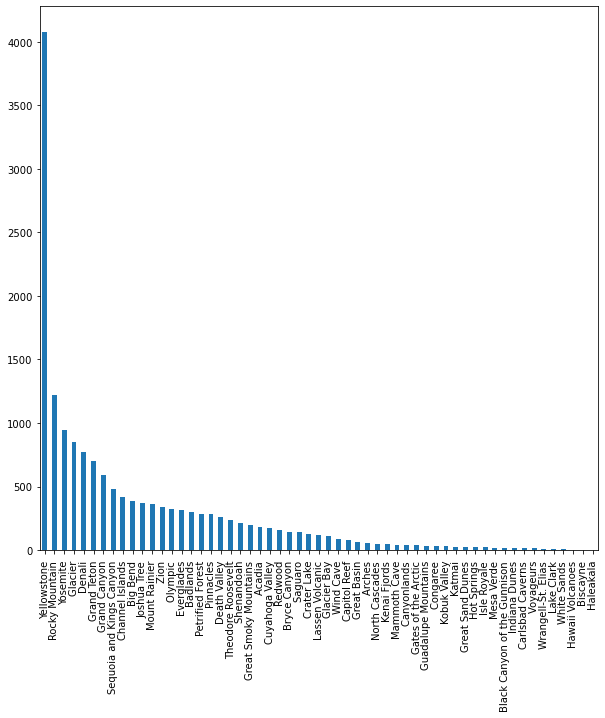

In [41]:
#observations per park total
plt.figure(figsize = (10,10))
observation['ParkName'].value_counts().plot(kind= 'bar')

In [42]:
observation['ParkName'].value_counts()

Yellowstone                      4075
Rocky Mountain                   1219
Yosemite                          947
Glacier                           854
Denali                            775
Grand Teton                       700
Grand Canyon                      590
Sequoia and Kings Canyon          479
Channel Islands                   414
Big Bend                          390
Joshua Tree                       373
Mount Rainier                     360
Zion                              336
Olympic                           326
Everglades                        315
Badlands                          296
Petrified Forest                  285
Pinnacles                         281
Death Valley                      263
Theodore Roosevelt                237
Shenandoah                        216
Great Smoky Mountains             196
Acadia                            178
Cuyahoga Valley                   171
Redwood                           156
Bryce Canyon                      142
Saguaro     

In [69]:
observation = observation.loc[(observation['ParkName'].map(observation['ParkName'].value_counts())  >= 40)]

<AxesSubplot:>

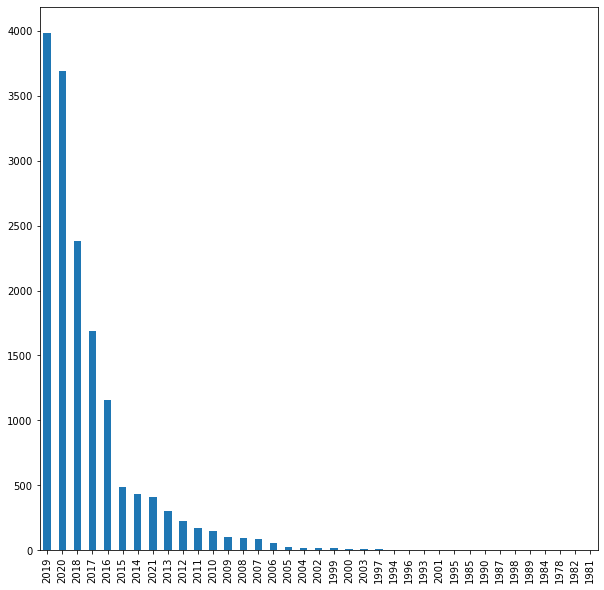

In [44]:
#observations per year
plt.figure(figsize = (10,10))
observation['observed_on'].dt.year.value_counts().plot(kind= 'bar')

In [45]:
#what year was inaturalist founded?? ans: Launched in 2008. drop all obs from before and all obs after 2019
observation1 = observation.sort_values(by= 'observed_on')
observation1 = observation.loc[(observation['observed_on']  >= '2008-1-1') & (observation['observed_on'] <= '2019-12-31')]

In [46]:
observation1.head(1)

,observed_on,place_guess,latitude,longitude,place_state_name,scientific_name,common_name,iconic_taxon_name,park,state,ParkName,Park
0,2008-08-08,"Yellowstone National Park, Park County, US-WY, US",44.811585,-110.481333,Wyoming,Bison bison,American Bison,Mammalia,Yellowstone National Park,WY,Yellowstone,Yellowstone NP


In [47]:
observation1.shape

(11176, 12)

In [48]:
df= observation1
df['observed_on'] = df['observed_on'].dt.strftime('%Y-%m')

<ipython-input-48-b4f50f15e7b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['observed_on'] = df['observed_on'].dt.strftime('%Y-%m')


In [49]:
df= observation1.set_index('observed_on', drop= True)

In [50]:
df.shape

(11176, 11)

In [51]:
#df1 = df.groupby(['Park', df.index.year, df.index.month]).agg({'latitude':'count', 'scientific_name': 'nunique', 'common_name': })
df1 = df.groupby(['Park', df.index]).agg({'latitude':'count', 'scientific_name': 'nunique'})
df1.rename(columns = {'latitude':'mammal_count', 'scientific_name': 'num_mammals_observed'}, inplace= True)
df1.tail()

mammal_count  num_mammals_observed
Park    observed_on                                    
Zion NP 2019-08                 9                     4
        2019-09                 4                     3
        2019-10                 4                     2
        2019-11                 5                     2
        2019-12                 3                     1

In [52]:
print(len(df.common_name.unique()), len(df.scientific_name.unique()))

280 289


In [53]:
# Where there is a 3rd word I need to remove it. No need for subspecies designations
df['scientific_name'] = df.scientific_name.apply(lambda x : " ".join(x.split()[0:2]))

In [54]:
df0= df[['scientific_name', 'Park']]
df0 = pd.get_dummies(df0,columns= ['scientific_name'], prefix = '', prefix_sep = '')
df0.head()

,Park,Alces alces,Alexandromys oeconomus,Ammospermophilus harrisii,Ammospermophilus leucurus,Antilocapra americana,Antilocapridae,Antrozous pallidus,Aplodontia rufa,Arctocephalus townsendi,...,Vespertilionidae,Vulpes macrotis,Vulpes vulpes,Xerinae,Xerospermophilus spilosoma,Xerospermophilus tereticaudus,Zalophus californianus,Zapus hudsonius,Zapus princeps,Zapus trinotatus
observed_on,,,,,,,,,,,,,,,,,,,,,
2008-08,Yellowstone NP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-05,Everglades NP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-06,Sequoia and Kings Canyon NP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-06,Sequoia and Kings Canyon NP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-04,Sequoia and Kings Canyon NP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df0 = df0.groupby(['Park', df.index]).sum()
df0.head()

Alces alces  Alexandromys oeconomus  \
Park      observed_on                                        
Acadia NP 2014-06                0                       0   
          2014-07                0                       0   
          2014-08                0                       0   
          2015-10                0                       0   
          2015-11                0                       0   

                       Ammospermophilus harrisii  Ammospermophilus leucurus  \
Park      observed_on                                                         
Acadia NP 2014-06                              0                          0   
          2014-07                              0                          0   
          2014-08                              0                          0   
          2015-10                              0                          0   
          2015-11                              0                          0   

                       Antilocapra americana  Antilocapridae  \
Park      observed_on                                          
Acadia NP 2014-06                          0               0   
          2014-07                          0               0   
          2014-08                          0               0   
          2015-10                          0               0   
          2015-11                          0               0   

                       Antrozous pallidus  Aplodontia rufa  \
Park      observed_on                                        
Acadia NP 2014-06                       0                0   
          2014-07                       0                0   
          2014-08                       0                0   
          2015-10                       0                0   
          2015-11                       0                0   

                       Arctocephalus townsendi  Artiodactyla  ...  \
Park      observed_on                                         ...   
Acadia NP 2014-06                            0             0  ...   
          2014-07                            0             0  ...   
          2014-08                            0             0  ...   
          2015-10                            0             0  ...   
          2015-11                            0             0  ...   

                       Vespertilionidae  Vulpes macrotis  Vulpes vulpes  \
Park      observed_on                                                     
Acadia NP 2014-06                     0                0              0   
          2014-07                     0                0              0   
          2014-08                     0                0              0   
          2015-10                     0                0              0   
          2015-11                     0                0              0   

                       Xerinae  Xerospermophilus spilosoma  \
Park      observed_on                                        
Acadia NP 2014-06            0                           0   
          2014-07            0                           0   
          2014-08            0                           0   
          2015-10            0                           0   
          2015-11            0                           0   

                       Xerospermophilus tereticaudus  Zalophus californianus  \
Park      observed_on                                                          
Acadia NP 2014-06                                  0                       0   
          2014-07                                  0                       0   
          2014-08                                  0                       0   
          2015-10                                  0                       0   
          2015-11                                  0                       0   

                       Zapus hudsonius  Zapus princeps  Zapus trinotatus  
Park      observed_on                                                

In [56]:
df_merge = df1.merge(df0, on = ['Park', 'observed_on'])
df_merge.tail()

mammal_count  num_mammals_observed  Alces alces  \
Park    observed_on                                                    
Zion NP 2019-08                 9                     4            0   
        2019-09                 4                     3            0   
        2019-10                 4                     2            0   
        2019-11                 5                     2            0   
        2019-12                 3                     1            0   

                     Alexandromys oeconomus  Ammospermophilus harrisii  \
Park    observed_on                                                      
Zion NP 2019-08                           0                          0   
        2019-09                           0                          0   
        2019-10                           0                          0   
        2019-11                           0                          0   
        2019-12                           0                          0   

                     Ammospermophilus leucurus  Antilocapra americana  \
Park    observed_on                                                     
Zion NP 2019-08                              0                      0   
        2019-09                              0                      0   
        2019-10                              0                      0   
        2019-11                              0                      0   
        2019-12                              0                      0   

                     Antilocapridae  Antrozous pallidus  Aplodontia rufa  ...  \
Park    observed_on                                                       ...   
Zion NP 2019-08                   0                   0                0  ...   
        2019-09                   0                   0                0  ...   
        2019-10                   0                   0                0  ...   
        2019-11                   0                   0                0  ...   
        2019-12                   0                   0                0  ...   

                     Vespertilionidae  Vulpes macrotis  Vulpes vulpes  \
Park    observed_on                                                     
Zion NP 2019-08                     0                0              0   
        2019-09                     0                0              0   
        2019-10                     0                0              0   
        2019-11                     0                0              0   
        2019-12                     0                0              0   

                     Xerinae  Xerospermophilus spilosoma  \
Park    observed_on                                        
Zion NP 2019-08            0                           0   
        2019-09            0                           0   
        2019-10            0                           0   
        2019-11            0                           0   
        2019-12            0                           0   

                     Xerospermophilus tereticaudus  Zalophus californianus  \
Park    observed_on                                                          
Zion NP 2019-08                                  0                       0   
        2019-09                                  0                       0   
        2019-10                                  0                       0   
        2019-11                                  0                       0   
        2019-12                                  0                       0   

                     Zapus hudsonius  Zapus princeps  Zapus trinotatus  
Park    observed_on                                                     
Zion NP 2019-08                    0               0                 0  
        2019-09                    0               0                 0  
        2019-10                    0               0                 0  
        2019-11                    0               0                 0  

In [82]:
df_filter = df_merge.filter(['Park','observed_on', 'mammal_count', 'num_mammals_observed', 'Alces alces','Antilocapra americana','Bison bison','Ursus americanus','Ursus arctos','Cervus canadensis','Canis lupus', 'Procyon lotor', 'Odocoileus virginianus', 'Odocoileus hemionus'])
df_filter.head()

mammal_count  num_mammals_observed  Alces alces  \
Park      observed_on                                                    
Acadia NP 2014-06                 1                     1            0   
          2014-07                 1                     1            0   
          2014-08                 1                     1            0   
          2015-10                 1                     1            0   
          2015-11                 1                     1            0   

                       Antilocapra americana  Bison bison  Ursus americanus  \
Park      observed_on                                                         
Acadia NP 2014-06                          0            0                 0   
          2014-07                          0            0                 0   
          2014-08                          0            0                 0   
          2015-10                          0            0                 0   
          2015-11                          0            0                 0   

                       Ursus arctos  Cervus canadensis  Canis lupus  \
Park      observed_on                                                 
Acadia NP 2014-06                 0                  0            0   
          2014-07                 0                  0            0   
          2014-08                 0                  0            0   
          2015-10                 0                  0            0   
          2015-11                 0                  0            0   

                       Procyon lotor  Odocoileus virginianus  \
Park      observed_on                                          
Acadia NP 2014-06                  0                       1   
          2014-07                  0                       0   
          2014-08                  0                       0   
          2015-10                  0                       0   
          2015-11                  0                       0   

                       Odocoileus hemionus  
Park      observed_on                       
Acadia NP 2014-06                        0  
          2014-07                        0  
          2014-08                        0  
          2015-10                        0  
          2015-11                        0

In [83]:
df_filter.tail()

mammal_count  num_mammals_observed  Alces alces  \
Park    observed_on                                                    
Zion NP 2019-08                 9                     4            0   
        2019-09                 4                     3            0   
        2019-10                 4                     2            0   
        2019-11                 5                     2            0   
        2019-12                 3                     1            0   

                     Antilocapra americana  Bison bison  Ursus americanus  \
Park    observed_on                                                         
Zion NP 2019-08                          0            0                 0   
        2019-09                          0            0                 0   
        2019-10                          0            0                 0   
        2019-11                          0            0                 0   
        2019-12                          0            0                 0   

                     Ursus arctos  Cervus canadensis  Canis lupus  \
Park    observed_on                                                 
Zion NP 2019-08                 0                  0            0   
        2019-09                 0                  0            0   
        2019-10                 0                  0            0   
        2019-11                 0                  0            0   
        2019-12                 0                  0            0   

                     Procyon lotor  Odocoileus virginianus  \
Park    observed_on                                          
Zion NP 2019-08                  0                       0   
        2019-09                  0                       0   
        2019-10                  0                       0   
        2019-11                  0                       0   
        2019-12                  0                       0   

                     Odocoileus hemionus  
Park    observed_on                       
Zion NP 2019-08                        3  
        2019-09                        1  
        2019-10                        3  
        2019-11                        4  
        2019-12                        3

In [84]:
df_filter.shape

(1644, 12)

In [85]:
NP_visit = pd.read_csv('Data/NP_visit_for_merge.csv',index_col= 0, parse_dates= ['Month_Year'])
NP_visit['Month_Year'] = NP_visit['Month_Year'].dt.strftime('%Y-%m')
NP_visit.rename(mapper = {'Month_Year':'observed_on', 'ParkName':'Park'}, axis = 1, inplace= True)
NP_visit.head()

,observed_on,Park,ParkType,Region,State,RecreationVisits,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,Backcountry
0,1979-01,Acadia NP,National Park,Northeast,ME,6011,0,0,102,13,0
1,1979-02,Acadia NP,National Park,Northeast,ME,5243,0,0,53,8,0
2,1979-03,Acadia NP,National Park,Northeast,ME,11165,0,0,176,37,0
3,1979-04,Acadia NP,National Park,Northeast,ME,219351,0,0,1037,459,0
4,1979-05,Acadia NP,National Park,Northeast,ME,339416,0,0,3193,1148,0


In [86]:
NP_visit.shape

(29447, 11)

In [87]:
NP_visit.set_index(['Park', 'observed_on'], inplace = True)
NP_visit.shape

(29447, 9)

In [88]:
NP_visit.head()

ParkType      Region State  RecreationVisits  \
Park      observed_on                                                      
Acadia NP 1979-01      National Park  Northeast     ME              6011   
          1979-02      National Park  Northeast     ME              5243   
          1979-03      National Park  Northeast     ME             11165   
          1979-04      National Park  Northeast     ME            219351   
          1979-05      National Park  Northeast     ME            339416   

                       ConcessionerLodging  ConcessionerCamping  TentCampers  \
Park      observed_on                                                          
Acadia NP 1979-01                        0                    0          102   
          1979-02                        0                    0           53   
          1979-03                        0                    0          176   
          1979-04                        0                    0         1037   
          1979-05                        0                    0         3193   

                       RVCampers  Backcountry  
Park      observed_on                          
Acadia NP 1979-01             13            0  
          1979-02              8            0  
          1979-03             37            0  
          1979-04            459            0  
          1979-05           1148            0

In [89]:
obs_visit = df_filter.merge(NP_visit, left_index = True, right_index = True)

In [90]:
obs_visit.tail()

mammal_count  num_mammals_observed  Alces alces  \
Park    observed_on                                                    
Zion NP 2019-08                 9                     4            0   
        2019-09                 4                     3            0   
        2019-10                 4                     2            0   
        2019-11                 5                     2            0   
        2019-12                 3                     1            0   

                     Antilocapra americana  Bison bison  Ursus americanus  \
Park    observed_on                                                         
Zion NP 2019-08                          0            0                 0   
        2019-09                          0            0                 0   
        2019-10                          0            0                 0   
        2019-11                          0            0                 0   
        2019-12                          0            0                 0   

                     Ursus arctos  Cervus canadensis  Canis lupus  \
Park    observed_on                                                 
Zion NP 2019-08                 0                  0            0   
        2019-09                 0                  0            0   
        2019-10                 0                  0            0   
        2019-11                 0                  0            0   
        2019-12                 0                  0            0   

                     Procyon lotor  ...  Odocoileus hemionus       ParkType  \
Park    observed_on                 ...                                       
Zion NP 2019-08                  0  ...                    3  National Park   
        2019-09                  0  ...                    1  National Park   
        2019-10                  0  ...                    3  National Park   
        2019-11                  0  ...                    4  National Park   
        2019-12                  0  ...                    3  National Park   

                             Region State RecreationVisits  \
Park    observed_on                                          
Zion NP 2019-08      Intermountain     UT           535322   
        2019-09      Intermountain     UT           497443   
        2019-10      Intermountain     UT           429604   
        2019-11      Intermountain     UT           230180   
        2019-12      Intermountain     UT           171706   

                     ConcessionerLodging  ConcessionerCamping  TentCampers  \
Park    observed_on                                                          
Zion NP 2019-08                    11167                    0        17568   
        2019-09                     8633                    0        12482   
        2019-10                     6762                    0        11009   
        2019-11                     6291                    0         5650   
        2019-12                     5752                    0         1895   

                     RVCampers  Backcountry  
Park    observed_on                          
Zion NP 2019-08           8042         1721  
        2019-09           8182         2007  
        2019-10           8969         2117  
        2019-11           5774          970  
        2019-12           1493          166  

[5 rows x 21 columns]

In [91]:
obs_visit.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1644 entries, ('Acadia NP', '2014-06') to ('Zion NP', '2019-12')
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   mammal_count            1644 non-null   int64 
 1   num_mammals_observed    1644 non-null   int64 
 2   Alces alces             1644 non-null   uint8 
 3   Antilocapra americana   1644 non-null   uint8 
 4   Bison bison             1644 non-null   uint8 
 5   Ursus americanus        1644 non-null   uint8 
 6   Ursus arctos            1644 non-null   uint8 
 7   Cervus canadensis       1644 non-null   uint8 
 8   Canis lupus             1644 non-null   uint8 
 9   Procyon lotor           1644 non-null   uint8 
 10  Odocoileus virginianus  1644 non-null   uint8 
 11  Odocoileus hemionus     1644 non-null   uint8 
 12  ParkType                1644 non-null   object
 13  Region                  1644 non-null   object
 14  State          

In [92]:
obs_visit.corr()

,mammal_count,num_mammals_observed,Alces alces,Antilocapra americana,Bison bison,Ursus americanus,Ursus arctos,Cervus canadensis,Canis lupus,Procyon lotor,Odocoileus virginianus,Odocoileus hemionus,RecreationVisits,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,Backcountry
mammal_count,1.000000,0.843862,0.460382,0.660771,0.798130,0.721620,0.710831,0.745974,0.677072,0.009631,0.073524,0.372191,0.333061,0.378685,0.425078,0.181961,0.236746,0.127507
num_mammals_observed,0.843862,1.000000,0.424955,0.499421,0.576493,0.563067,0.561537,0.597272,0.513230,0.071426,0.095900,0.452527,0.371610,0.374504,0.408914,0.253849,0.304609,0.162336
Alces alces,0.460382,0.424955,1.000000,0.217908,0.093636,0.206437,0.269715,0.436709,0.109087,0.016529,0.013502,0.193552,0.187852,0.028038,0.139015,0.015992,0.043245,0.038133
Antilocapra americana,0.660771,0.499421,0.217908,1.000000,0.687860,0.535826,0.507380,0.511431,0.580427,-0.002614,-0.030494,0.162984,0.149981,0.276085,0.373490,-0.021455,0.019714,-0.009889
Bison bison,0.798130,0.576493,0.093636,0.687860,1.000000,0.592687,0.651753,0.651140,0.766831,-0.023045,-0.028885,0.086703,0.243794,0.457308,0.577404,0.054998,0.104500,0.040592
Ursus americanus,0.721620,0.563067,0.206437,0.535826,0.592687,1.000000,0.471850,0.435064,0.445484,0.011660,0.119085,0.335472,0.162768,0.282247,0.257651,0.187632,0.208063,0.089439
Ursus arctos,0.710831,0.561537,0.269715,0.507380,0.651753,0.471850,1.000000,0.404097,0.659282,-0.031031,0.014923,0.042948,0.200656,0.313655,0.380103,0.052520,0.159969,0.037190
Cervus canadensis,0.745974,0.597272,0.436709,0.511431,0.651140,0.435064,0.404097,1.000000,0.520614,-0.009450,-0.043313,0.197317,0.324319,0.301865,0.349242,0.089118,0.106476,0.154162
Canis lupus,0.677072,0.513230,0.109087,0.580427,0.766831,0.445484,0.659282,0.520614,1.000000,-0.026033,-0.034181,0.054498,0.181067,0.376705,0.476304,0.026379,0.092666,0.034214
Procyon lotor,0.009631,0.071426,0.016529,-0.002614,-0.023045,0.011660,-0.031031,-0.009450,-0.026033,1.000000,0.053683,0.043052,0.019904,-0.034986,-0.021585,-0.019415,-0.022461,-0.023245


<AxesSubplot:>

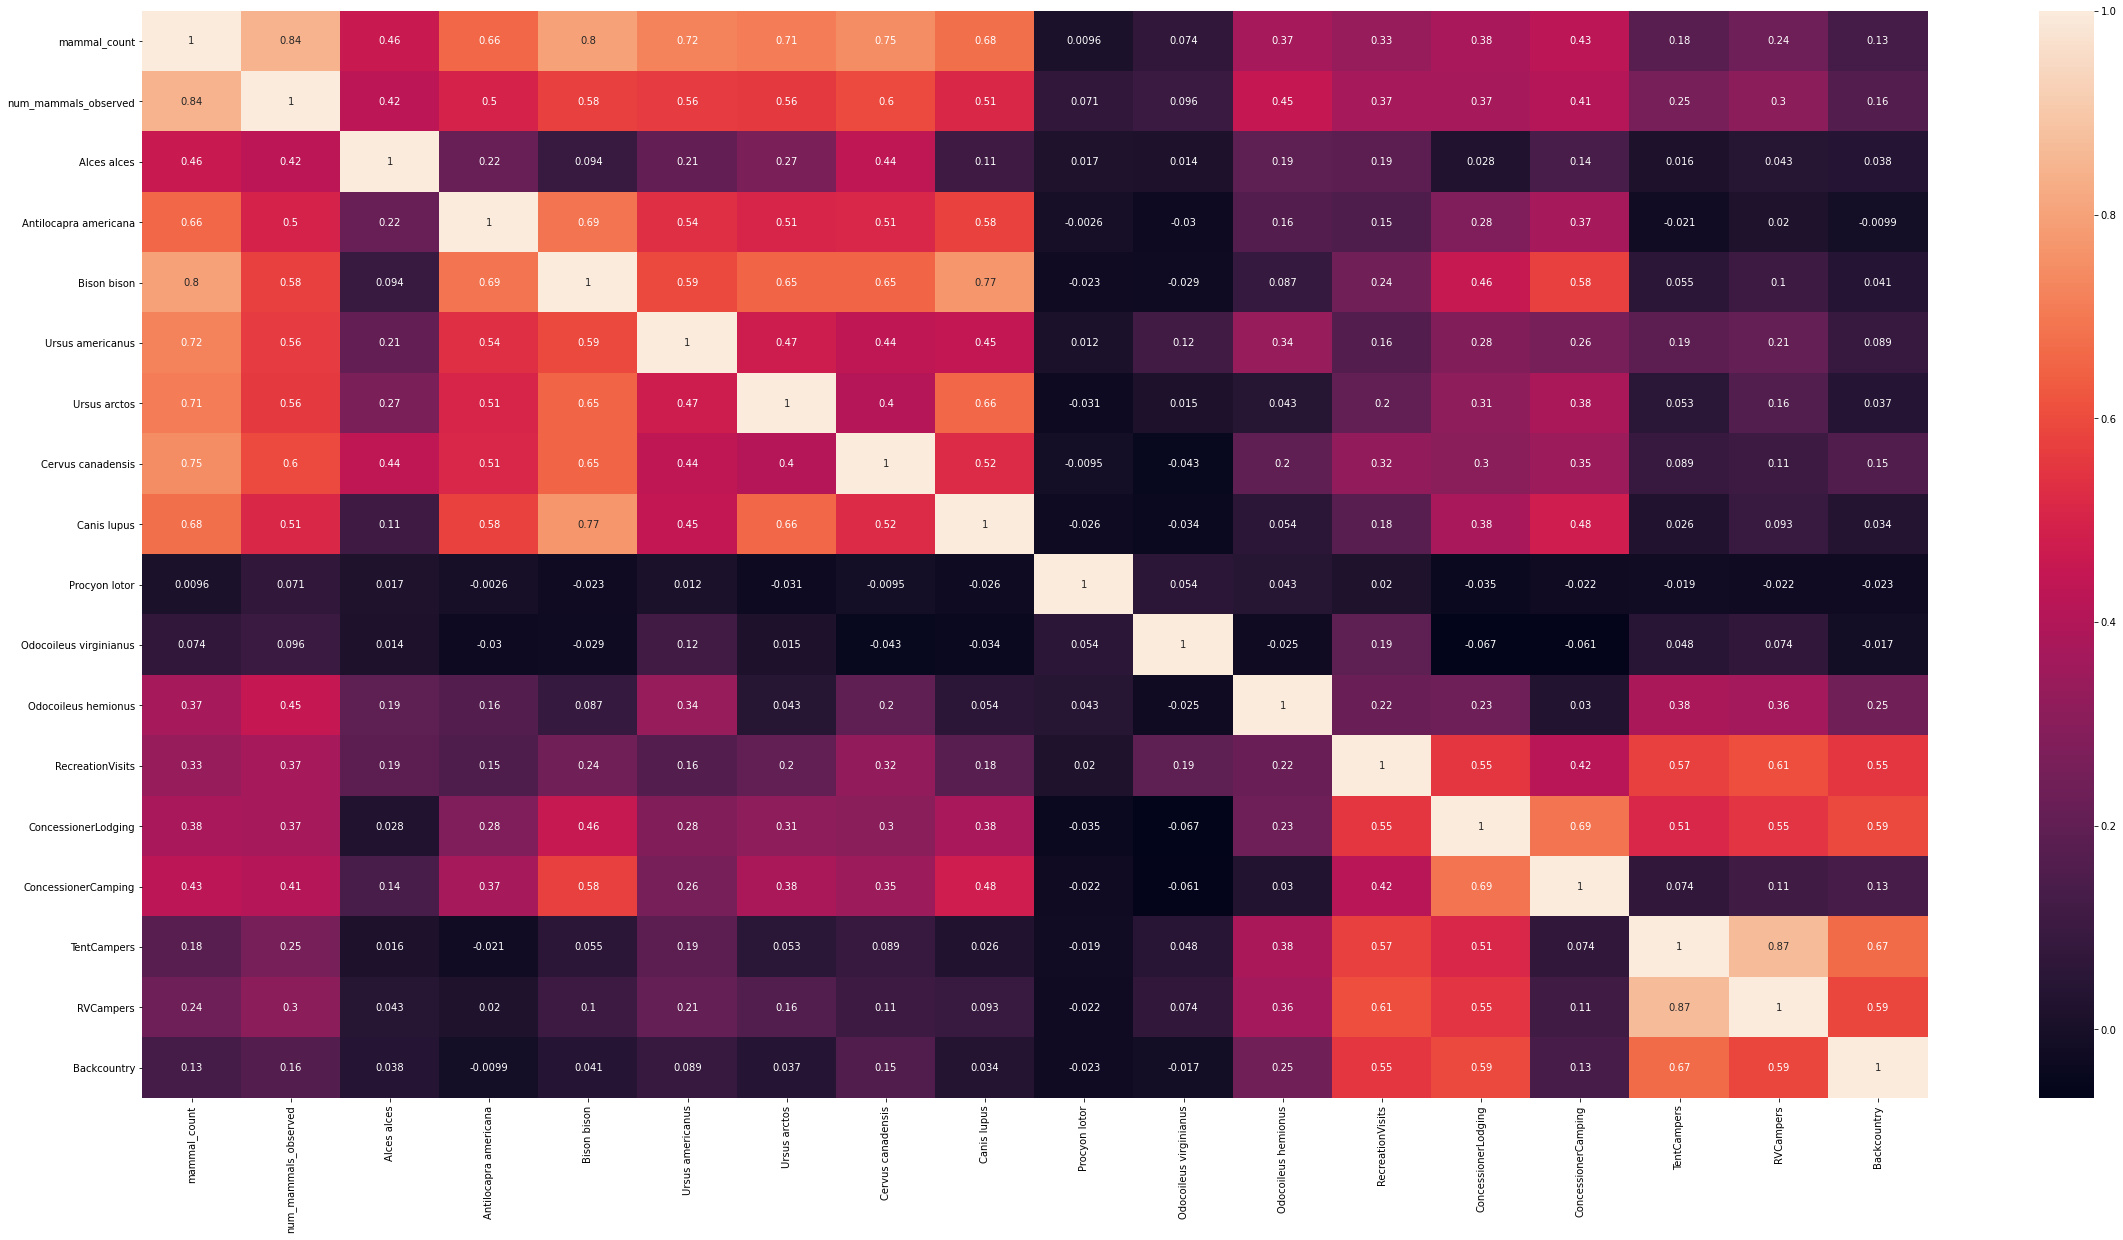

In [93]:
plt.figure(figsize = (40,20))
sns.heatmap(obs_visit.corr(), annot = True)

In [94]:
#obs_visit.to_csv('Data/obs_visit.csv')